<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Geophysikalisches Praktikum: Modelling

## Geocampus Lankwitz
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*



In this notebook, we want to move on to make a model for the GeoCampus.

*Needs to be filled with life, try live?*


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import GP_modules
import lib_modelling
GP_modules.change_fontsize()

----
## Topography

Read elevation data from file, extract sub-region, and shif elevation to total offset with
value `ZTOP`.

In [2]:
#-----------------------------------------------------------------------
# read topo data into field
#-----------------------------------------------------------------------
inpath='data/'
infile1='Campus.xyz'
TOPO=np.loadtxt(fname=inpath+infile1, dtype='float',skiprows=6)
ZTOP=1000.

X = np.array([])
Y = np.array([])
Z = np.array([])
for i in range(TOPO.shape[0]):
    if (TOPO[i,0]>388300 and TOPO[i,0]<388450):
        if (TOPO[i,1]>5809720 and TOPO[i,1]<5809870):
            X = np.append(X,TOPO[i,0])
            Y = np.append(Y,TOPO[i,1])
            Z = np.append(Z,TOPO[i,2])
Z    = ZTOP - Z

print ( "%s%8.0f %8.0f" % ('easting min/max:   ',TOPO[:,0].min(),TOPO[:,0].max()))
print ( "%s%8.0f %8.0f" % ('northing min/max:  ',TOPO[:,1].min(),TOPO[:,1].max()))
print ( "%s%8.2f %8.2f" % ('elevation min/max: ',TOPO[:,2].min(),TOPO[:,2].max()))
print ( "%s%8.2f %8.2f" % ('elevation min/max: ',ZTOP-Z.min(),ZTOP-Z.max()))
print(TOPO.shape)
print(Z.shape)

easting min/max:     388200   388600
northing min/max:   5809500  5809900
elevation min/max:    40.43    46.28
elevation min/max:    45.80    42.54
(160801, 3)
(22201,)


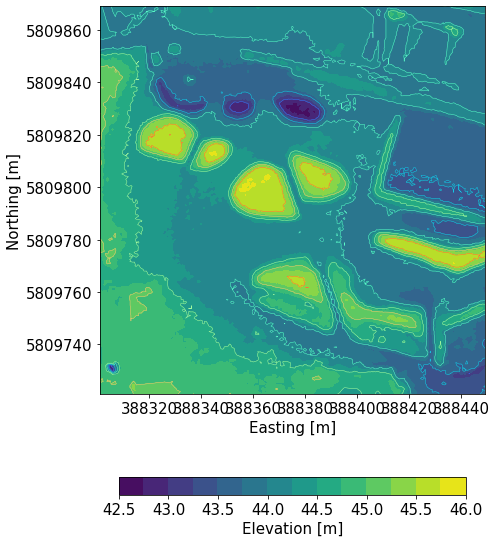

In [3]:
fig,ax1 = plt.subplots(1,1,figsize=(7.0, 8.0))

ax1.set_xlabel('Easting [m]')
ax1.set_ylabel('Northing [m]')
ax1.ticklabel_format(useOffset=False)
im=ax1.tricontourf(X, Y, ZTOP-Z, 15)
ax1.tricontour(X, Y, ZTOP-Z, cmap = plt.get_cmap('rainbow'),linewidths=0.5)
fig.colorbar(im,ax=ax1,label='Elevation [m]',orientation="horizontal",shrink=0.9)
plt.tight_layout()

----
## Gravity and magnetic anomalies

Function to sum up all elements over the elevation grid.

In [4]:
def signal(X,Y,Z,XP,YP,ZP,ZTOP,RP,RHOP,MAG):
    boug  = np.zeros(X.shape[0])
    total = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        for k in range(len(XP)):
            gx,gy,gz = lib_modelling.grav_sphere(xo=X[i],yo=Y[i],zo=Z[i],
                                   xp=XP[k],yp=YP[k],zp=ZTOP-ZP[k],radius=RP[k],rho=RHOP[k])
            boug[i] = boug[i] + gz
            bx,by,bz,t = lib_modelling.mag_sphere(xo=X[i],yo=Y[i],zo=Z[i],
                                    xp=XP[k],yp=YP[k],zp=ZTOP-ZP[k],radius=RP[k],
                            earthincl=67.,earthdecl=0.,mag=MAG[k],incl=90.,decl=0.,theta=0.)
            total[i] = total[i] + t
    return boug,total

Define gravity and magnetic elements in real coordinates.

In [5]:
XP=[388352.06]
YP=[5809820.56]
ZP=[41.]
RP =[1.]
RHOP =[-2000]
MAG = [0.4]


In [7]:
boug,total = signal(X,Y,Z,XP,YP,ZP,ZTOP,RP,RHOP,MAG)
print(boug.shape)
print(boug.min(),boug.max())
print(total.min(),total.max())

(22201,)
-0.005822501996901912 -5.051477380884656e-08
-0.5764246003656934 10.336306010719072


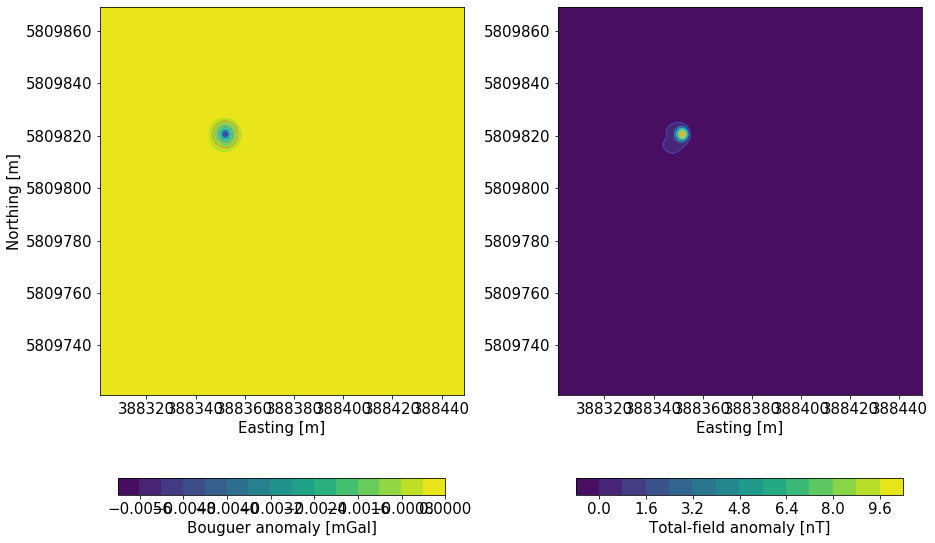

In [8]:
fig,ax = plt.subplots(1,2,figsize=(13.0, 8.0))

ax[0].set_xlabel('Easting [m]')
ax[0].set_ylabel('Northing [m]')
ax[0].ticklabel_format(useOffset=False)
im=ax[0].tricontourf(X, Y, boug, 15)
ax[0].tricontour(X, Y, boug, cmap = plt.get_cmap('rainbow'),linewidths=0.5)
fig.colorbar(im,ax=ax[0],label='Bouguer anomaly [mGal]',orientation="horizontal",shrink=0.9)

ax[1].set_xlabel('Easting [m]')
#ax[1].set_ylabel('Northing [m]')
ax[1].ticklabel_format(useOffset=False)
im=ax[1].tricontourf(X, Y, total, 15)
ax[1].tricontour(X, Y, total, cmap = plt.get_cmap('rainbow'),linewidths=0.5)
fig.colorbar(im,ax=ax[1],label='Total-field anomaly [nT]',orientation="horizontal",shrink=0.9)

plt.tight_layout()

... done